In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

datos = pd.read_csv("AIRBNB.csv")
datos.head(3)


/tmp/ipykernel_10285/3140855592.py:6: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  datos = pd.read_csv("AIRBNB.csv")


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2818,https://www.airbnb.com/rooms/2818,20210409161549,12/04/2021,Quiet Garden View Room & Super Fast WiFi,Quiet Garden View Room & Super Fast WiFi<br />...,"Indische Buurt (""Indies Neighborhood"") is a ne...",https://a0.muscache.com/pictures/10272854/8dcc...,3159,https://www.airbnb.com/users/show/3159,...,10.0,9.0,10.0,NaN,t,1,0,1,0,1.90
1,20168,https://www.airbnb.com/rooms/20168,20210409161549,12/04/2021,Studio with private bathroom in the centre 1,17th century Dutch townhouse in the heart of t...,Located just in between famous central canals....,https://a0.muscache.com/pictures/69979628/fd6a...,59484,https://www.airbnb.com/users/show/59484,...,10.0,10.0,9.0,0363 CBB3 2C10 0C2A 1E29,t,2,0,2,0,2.50
2,25428,https://www.airbnb.com/rooms/25428,20210409161549,11/04/2021,"Lovely, 1 bed apt in Ctr (w.lift) -3/20-6/20(f...",Lovely apt in Centre ( lift & fireplace) near ...,NaN,https://a0.muscache.com/pictures/138431/7079a9...,56142,https://www.airbnb.com/users/show/56142,...,10.0,10.0,10.0,NaN,f,2,2,0,0,0.13


# ¿Que tipo de columnas tiene nuestro dataset?

In [2]:
datos.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 74, dtype: object

In [3]:
dx  =  datos.review_scores_rating.dropna().to_frame()
dx.reset_index()
dx.dtypes

review_scores_rating    float64
dtype: object

El conjunto de datos evidencia que tenemos diferente tipos de datos, entre ellos observamos enteros, objetos y floats, esto es importante, pero también vemos que el conjunto datos es realmente ancho, aportando 74 columnas, por lo cual es importante reconocer la necesidad de trabajar toda la información. 

# ¿Cómo se distribuyen los precios en el conjunto de datos y cuáles son los valores más comunes de calificaciones?

In [4]:
n = dx.shape[0] # devuelve la cantidad de registros y columnas

k = 1 + (10/3) *np.log10(n) # esto es la formula de sturges
k = int(k.round(0))
k
# esto es par acalcular los bins de la manera adecuada

15

In [5]:
# vamos a calcular los bins por lista por facilidad
bins = [20,26,32,38,44,50,56,62,68,74,80,86,92,98,104]

frecuencia= pd.value_counts(
   pd.cut(
      x = dx.review_scores_rating,
      bins = bins,
      include_lowest = True
    ),
   sort = False
)
frecuencia

(19.999, 26.0]      24
(26.0, 32.0]         1
(32.0, 38.0]         0
(38.0, 44.0]        22
(44.0, 50.0]         9
(50.0, 56.0]         3
(56.0, 62.0]        94
(62.0, 68.0]        31
(68.0, 74.0]        80
(74.0, 80.0]       449
(80.0, 86.0]       443
(86.0, 92.0]      2037
(92.0, 98.0]      6481
(98.0, 104.0]     5513
Name: review_scores_rating, dtype: int64

In [6]:
porcentual = pd.value_counts(
   pd.cut(
      x = dx.review_scores_rating,
      bins = bins,
      include_lowest = True
    ),
   sort = False,
   normalize = True
    
) * 100 
porcentual

(19.999, 26.0]     0.158030
(26.0, 32.0]       0.006585
(32.0, 38.0]       0.000000
(38.0, 44.0]       0.144861
(44.0, 50.0]       0.059261
(50.0, 56.0]       0.019754
(56.0, 62.0]       0.618950
(62.0, 68.0]       0.204122
(68.0, 74.0]       0.526766
(74.0, 80.0]       2.956476
(80.0, 86.0]       2.916968
(86.0, 92.0]      13.412787
(92.0, 98.0]      42.674656
(98.0, 104.0]     36.300784
Name: review_scores_rating, dtype: float64

In [7]:
acumulada = frecuencia.cumsum()
acumulada

acumulada_porcentual = porcentual.cumsum()
acumulada_porcentual

(19.999, 26.0]      0.158030
(26.0, 32.0]        0.164614
(32.0, 38.0]        0.164614
(38.0, 44.0]        0.309475
(44.0, 50.0]        0.368736
(50.0, 56.0]        0.388490
(56.0, 62.0]        1.007441
(62.0, 68.0]        1.211563
(68.0, 74.0]        1.738329
(74.0, 80.0]        4.694805
(80.0, 86.0]        7.611773
(86.0, 92.0]       21.024560
(92.0, 98.0]       63.699216
(98.0, 104.0]     100.000000
Name: review_scores_rating, dtype: float64

In [8]:
tabla_r = pd.DataFrame({"Frecuencia":frecuencia, "Relativa":porcentual, "Acumulada":acumulada,"Acumulada_%":acumulada_porcentual})
tabla_r

,Frecuencia,Relativa,Acumulada,Acumulada_%
"(19.999, 26.0]",24,0.158030,24,0.158030
"(26.0, 32.0]",1,0.006585,25,0.164614
"(32.0, 38.0]",0,0.000000,25,0.164614
"(38.0, 44.0]",22,0.144861,47,0.309475
"(44.0, 50.0]",9,0.059261,56,0.368736
"(50.0, 56.0]",3,0.019754,59,0.388490
"(56.0, 62.0]",94,0.618950,153,1.007441
"(62.0, 68.0]",31,0.204122,184,1.211563
"(68.0, 74.0]",80,0.526766,264,1.738329
"(74.0, 80.0]",449,2.956476,713,4.694805


Podemos observar como se distribuyen los datos de las calificaciones, podemos ver que existe un gran rango de calificaciones que se concentra entre el intervalo 92.0 al 98.0, esto mostrando que su frecuencia es de 6481, indicando que es el valor que más se repite dentro de los bins, en este sentido vemos que esto representa al 63.69% del conjunto total de los datos, bajo este supuesto podemos concluir que la mayoría de las calificaciones estan concentradas en la parte superior, lo que indica un alto compromiso por cada entidad que se vincula a AIRBNB para ofrecer un buen servicio. 

In [41]:
df = datos.price.dropna()
a = df.quantile(0.78)

quantil_78 = datos.loc[(datos.price >= 195), "price"]
quantil_78.mean()

297.911905361188

In [34]:
datos.price.quantile(0.5)

129.0

In [35]:
mean = datos.price.dropna().mean()

std = datos.price.std()
std

154.16256588595425

In [36]:
suma = mean + 100
suma

254.4958765778401

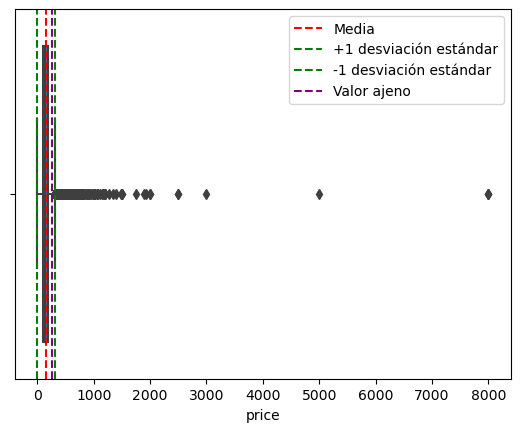

In [45]:
df = datos.price.dropna()
# Dibuja el boxplot
sns.boxplot( x=df)


# Dibuja las líneas para la media y la desviación estándar
plt.axvline(mean, color='r', linestyle='--', label='Media')
plt.axvline(mean+std, color='g', linestyle='--', label='+1 desviación estándar')
plt.axvline(mean-std, color='g', linestyle='--', label='-1 desviación estándar')

# Agrega una línea vertical para un valor ajeno
plt.axvline(suma, color='purple', linestyle='--', label='Valor ajeno')

# Añade leyendas
plt.legend()

# Muestra el plot
plt.show()


In [15]:
n = datos.shape[0] # devuelve la cantidad de registros y columnas

k = 1 + (10/3) * np.log10(n) # esto es la formula de sturges
k = int(k.round(0))
k
k1 = [100,200,300,400,500,600,700,800,900,1000,1100,1200]
# esto es par acalcular los bins de la manera adecuada


# Crear la tabla de frecuencia
frecuencia = pd.value_counts(pd.cut(datos.price, bins=k, include_lowest=True), sort=False)

# Crear la tabla de frecuencia relativa
relativa = frecuencia / len(datos)

# Crear la tabla de frecuencia acumulada
acumulada = frecuencia.cumsum()

# Crear la tabla de frecuencia acumulada porcentual
acumulada_porcentual = acumulada / len(datos) * 100

# Crear un DataFrame con todas las tablas
tabla = pd.DataFrame({"Frecuencia": frecuencia, "Relativa": relativa, "Acumulada": acumulada, "Acumulada_%": acumulada_porcentual})
tabla

,Frecuencia,Relativa,Acumulada,Acumulada_%
"(-8.001, 533.333]",17648,0.990070,17648,99.007013
"(533.333, 1066.667]",151,0.008471,17799,99.854137
"(1066.667, 1600.0]",14,0.000785,17813,99.932679
"(1600.0, 2133.333]",5,0.000281,17818,99.960729
"(2133.333, 2666.667]",2,0.000112,17820,99.971950
"(2666.667, 3200.0]",1,0.000056,17821,99.977560
"(3200.0, 3733.333]",0,0.000000,17821,99.977560
"(3733.333, 4266.667]",0,0.000000,17821,99.977560
"(4266.667, 4800.0]",0,0.000000,17821,99.977560
"(4800.0, 5333.333]",1,0.000056,17822,99.983170


In [56]:

# Obtener los cuantiles
quantiles = np.linspace(0, 1, num=101)  # 100 partes, incluyendo el mínimo y el máximo
valores_cuantiles = datos["price"].quantile(quantiles)

# Crear la tabla de quantiles
tabla_quantiles = pd.DataFrame({"Cuantil": quantiles, "Valor": valores_cuantiles})
tabla_quantiles

,Cuantil,Valor
0.00,0.00,0.00
0.01,0.01,31.00
0.02,0.02,40.00
0.03,0.03,47.00
0.04,0.04,50.00
...,...,...
0.96,0.96,350.00
0.97,0.97,392.12
0.98,0.98,447.52
0.99,0.99,524.76


In [60]:
datos["price"].quantile([0.25,0.5,0.75])
#180 - 95

0.25     95.0
0.50    129.0
0.75    180.0
Name: price, dtype: float64

Lo que podemos observar es que en la columna precio la tabla de frecuencias nos dificulta hacer un ejercicio descriptivo de manera sencilla, esto con ocasión a que se incluyen valores negativos dentro de los bins utilizando la formula de sturges, por tal motivo, se realiza una tabla de cuantiles de 0 a 100 que nos permite afirmar que existe gran variabilidad en los datos, no obstante la mayoría de los mismos son menores a 500, pudiendo ser 500 euores siendo en EUROPA, igualmente, vemos que el rango intercuantilico se establece en 85. Esto nos permite observar que el 50% de nuestros datos esta entre 95 y 180, cabe señalar que esta medida de variabilidad solo nos habla del rango intercuantilico y no de todo el conjunto de datos, por lo cual es dable afirmar que existen diferenets datos atipicos lo que genera una distribución sesgada hacia la derecha.  

<AxesSubplot:xlabel='room_type', ylabel='price'>

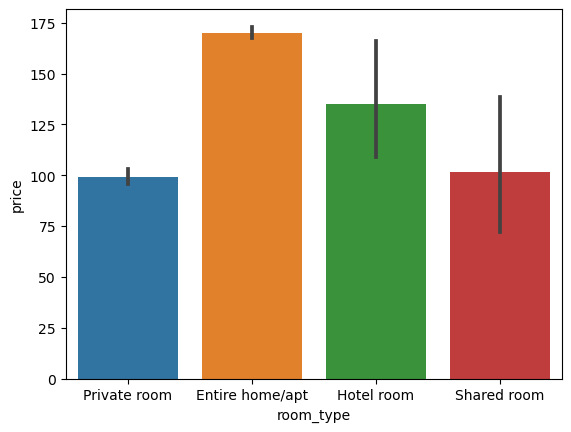

In [16]:
sns.barplot(y=datos.price.dropna(), x=datos.room_type.dropna())

Ahora, podemos ver que se presentan el tipo de habitación y su precio, observando que en la tipologia Casas y Apartamentos existe una mejor valoración respecto a este tipo y el precio que se paga, asi sucesivamente le siguen los hoteles, habitaciones compartidas y cuartos privados.

<AxesSubplot:xlabel='reviews_per_month', ylabel='room_type'>

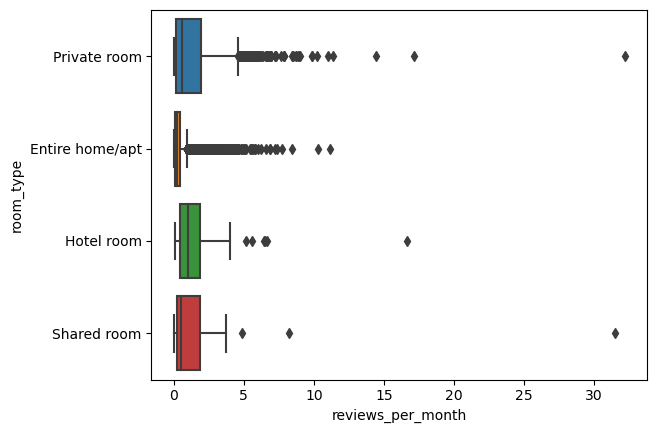

In [64]:
sns.boxplot(x=datos.reviews_per_month.dropna(), y=datos.room_type.dropna())

# ¿Existe algún tipo de asociación entre las calificaciones por mes y el precio?

In [82]:
df = datos[["price","reviews_per_month","room_type"]].dropna()

import scipy.stats as stats

corr, pvalue = stats.pearsonr(df.price, df.reviews_per_month)
(corr, pvalue)

df[["price","reviews_per_month"]].corr(method="pearson")


,price,reviews_per_month
price,1.000000,-0.091638
reviews_per_month,-0.091638,1.000000


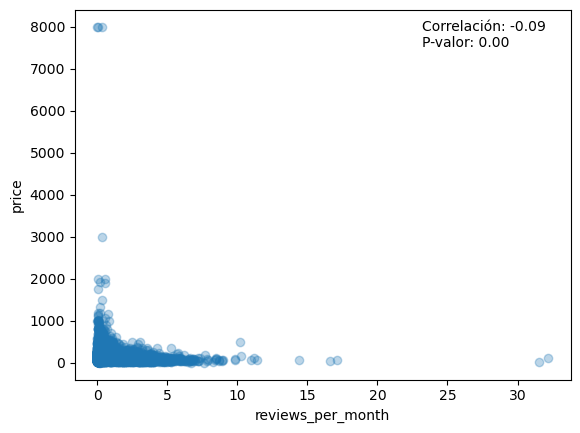

'print("Correlación: {:.2f}".format(corr))\nprint("Valor p: {:.2f}".format(pval))'

In [77]:

# Trazar gráfico de dispersión sin línea de ajuste y puntos semitransparentes
sns.regplot(y="price", x="reviews_per_month", data=df, fit_reg=False, scatter_kws={"alpha":0.3})

# Calcular correlación y valor p
corr, pval = stats.pearsonr(df["price"], df["reviews_per_month"])
plt.annotate("Correlación: {:.2f}\nP-valor: {:.2f}".format(corr, pval), xy=(0.7, 0.9), xycoords='axes fraction')
plt.show()
"""print("Correlación: {:.2f}".format(corr))
print("Valor p: {:.2f}".format(pval))"""

Podemos observar que en realidad existe una relación negativa mínima entre la variable precio y reviews por mes, esto nos indica que las calificaciones por mes no estan asociadas al valor de las habitación. 

In [81]:
# Calcular correlación y valor p de spearman
corr_spearman, pval_spearman = stats.spearmanr(df["room_type"].dropna(), df["reviews_per_month"])

print("Correlación de Spearman: {:.2f}".format(corr_spearman))
print("Valor p de Spearman: {:.2f}".format(pval_spearman))

Correlación de Spearman: 0.27
Valor p de Spearman: 0.00


Esto nos indica que existe una correlación de spearman moderada, que nos indica que existe asociación entre las calificaciones por mes y el tipo de habitación a alquilar. 


In [89]:
corr = datos[["reviews_per_month","room_type"]].corr(method="spearman")
corr

,reviews_per_month
reviews_per_month,1.0


In [91]:
stats.spearmanr(df["reviews_per_month"].dropna(), df["room_type"].dropna())

SpearmanrResult(correlation=0.26975626666459546, pvalue=2.2302377305336017e-255)

In [92]:
corr = datos[["reviews_per_month", "room_type"]].corr(method="spearman")
corr

,reviews_per_month
reviews_per_month,1.0


In [97]:
corr = datos[["reviews_per_month", "room_type"]].corr(method="spearman")
print(corr)


                   reviews_per_month
reviews_per_month                1.0


In [94]:
corr, pval = datos[["reviews_per_month","room_type"]].corr(method="spearman")
print("Correlación de Spearman: {:.2f}".format(corr))
print("Valor p de Spearman: {:.2f}".format(pval))


ValueError: not enough values to unpack (expected 2, got 1)